In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [185]:
forest = RandomForestClassifier(random_state = 999)

# DILI

In [186]:
df = pd.read_csv('./Model-Free-Final/DILI_Model_Free.csv')
df_raw = df.iloc[:,3:]
df_raw

,DILI,MFPS_1,MFPS_2,MFPS_3,MFPS_4,MFPS_5,MFPS_6,MFPS_7,MFPS_8,MFPS_9,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0
2224,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
x = df_raw.iloc[:, 1025:]
y = df_raw['DILI']

print(x.shape)
print(y.shape)

(2226, 181)
(2226,)


In [188]:
forest.fit(x,y)

RandomForestClassifier(random_state=999)

In [189]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [190]:
print("Feature Ranking")
index_list = []
for f in range(x.shape[1]):
#     print("{}. feature {} ({:.5f})".format(f+1, x.columns[indices][f], importances[indices[f]]))
    if importances[indices[f]] > 0.01:
        print("{}. feature {} ({:.5f})".format(f+1, x.columns[indices][f], importances[indices[f]]))
        index_list.append(indices[f])
index_list

Feature Ranking
1. feature BCUT2D_LOGPLOW (0.01689)
2. feature MolLogP (0.01567)
3. feature BCUT2D_MRHI (0.01530)
4. feature BCUT2D_MRLOW (0.01524)
5. feature BCUT2D_CHGHI (0.01517)
6. feature MaxEStateIndex (0.01427)
7. feature HallKierAlpha (0.01420)
8. feature BCUT2D_MWLOW (0.01403)
9. feature BCUT2D_LOGPHI (0.01396)
10. feature BalabanJ (0.01376)
11. feature FractionCSP3 (0.01349)
12. feature BCUT2D_CHGLO (0.01345)
13. feature SlogP_VSA2 (0.01304)
14. feature qed (0.01301)
15. feature VSA_EState2 (0.01268)
16. feature MaxAbsEStateIndex (0.01235)
17. feature SMR_VSA10 (0.01233)
18. feature FpDensityMorgan1 (0.01190)
19. feature VSA_EState4 (0.01177)
20. feature FpDensityMorgan2 (0.01130)
21. feature BCUT2D_MWHI (0.01120)
22. feature MinPartialCharge (0.01119)
23. feature Chi4v (0.01110)
24. feature MaxAbsPartialCharge (0.01106)
25. feature TPSA (0.01085)
26. feature MaxPartialCharge (0.01085)
27. feature VSA_EState6 (0.01084)
28. feature VSA_EState8 (0.01076)
29. feature MinEStateIn

[20,
 111,
 21,
 22,
 17,
 0,
 37,
 16,
 19,
 23,
 93,
 18,
 67,
 3,
 87,
 2,
 56,
 12,
 89,
 13,
 15,
 9,
 36,
 10,
 74,
 8,
 90,
 92,
 1,
 24,
 41,
 11,
 88,
 32,
 78]

In [191]:
df_index = pd.DataFrame(index_list)
df_index.T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,20,111,21,22,17,0,37,16,19,23,...,8,90,92,1,24,41,11,88,32,78


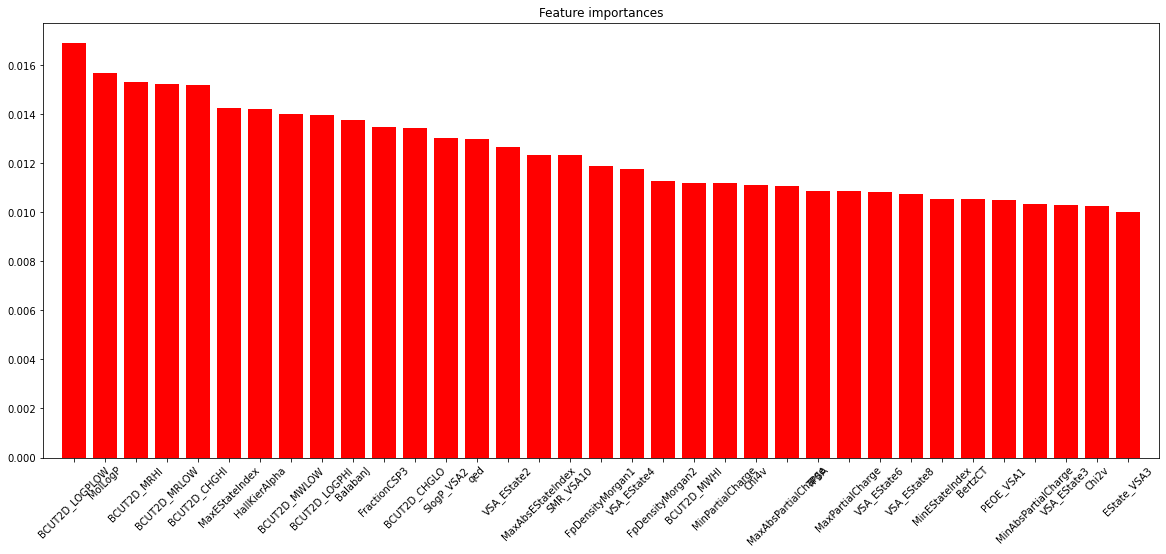

In [192]:
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(range(len(index_list)), importances[index_list], color='r', align='center')
plt.xticks(range(len(index_list)), x.columns[index_list], rotation=45)
plt.xlim([-1, len(index_list)])
plt.savefig('./Figure/DILI_FI.jpg', bbox_inches = 'tight')
plt.show()

# AMES Mutagenicity

In [136]:
df = pd.read_csv('./Model-Free-Final/AMES_Model_Free.csv')
df_raw = df.iloc[:,3:]
df_raw

,Mutagenicity,MFPS_1,MFPS_2,MFPS_3,MFPS_4,MFPS_5,MFPS_6,MFPS_7,MFPS_8,MFPS_9,...,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
x = df_raw.iloc[:, 1025:]
y = df_raw['Mutagenicity']

print(x.shape)
print(y.shape)

(8620, 130)
(8620,)


In [138]:
forest.fit(x,y)

RandomForestClassifier(random_state=999)

In [139]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature Ranking")
index_list = []
for f in range(x.shape[1]):
    if importances[indices[f]] > 0.01:
        print("{}. feature {} ({:.5f})".format(f+1, x.columns[indices][f], importances[indices[f]]))
        index_list.append(indices[f])
# index_list

Feature Ranking
1. feature BCUT2D_MWHI (0.02554)
2. feature BCUT2D_MRLOW (0.02410)
3. feature BCUT2D_MRHI (0.02303)
4. feature SMR_VSA7 (0.02213)
5. feature SMR_VSA10 (0.01958)
6. feature MaxAbsPartialCharge (0.01935)
7. feature VSA_EState4 (0.01898)
8. feature MolLogP (0.01847)
9. feature BCUT2D_CHGLO (0.01835)
10. feature MinAbsPartialCharge (0.01834)
11. feature BCUT2D_LOGPLOW (0.01823)
12. feature qed (0.01809)
13. feature MinEStateIndex (0.01796)
14. feature MinPartialCharge (0.01789)
15. feature MaxPartialCharge (0.01783)
16. feature BCUT2D_CHGHI (0.01760)
17. feature BCUT2D_LOGPHI (0.01717)
18. feature Chi3v (0.01700)
19. feature BalabanJ (0.01684)
20. feature SlogP_VSA5 (0.01662)
21. feature MaxAbsEStateIndex (0.01613)
22. feature MaxEStateIndex (0.01605)
23. feature MinAbsEStateIndex (0.01596)
24. feature FpDensityMorgan2 (0.01544)
25. feature FpDensityMorgan3 (0.01539)
26. feature Chi3n (0.01537)
27. feature VSA_EState8 (0.01525)
28. feature Chi4v (0.01518)
29. feature SlogP_

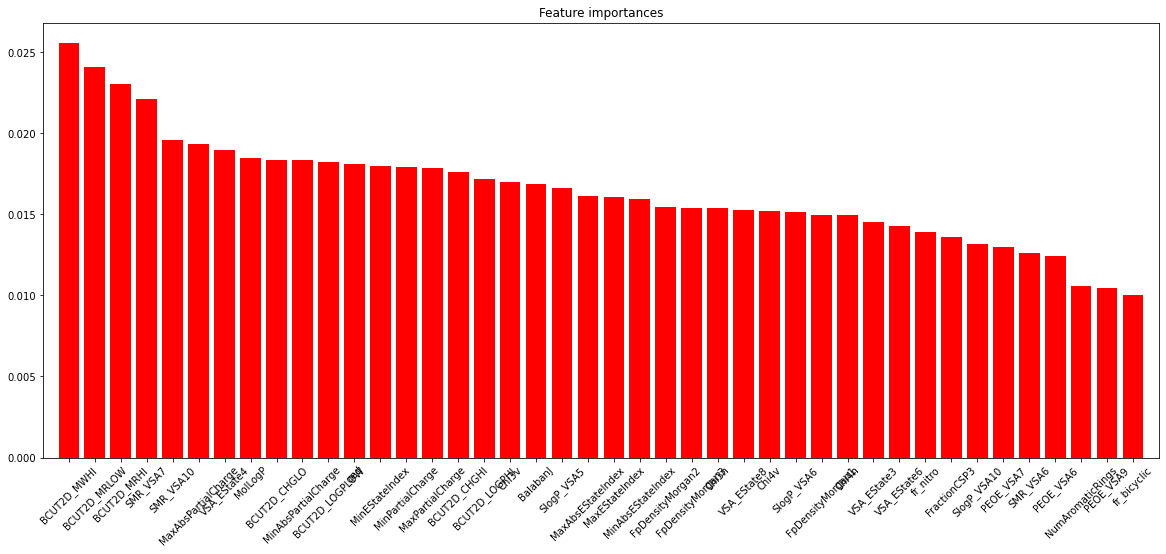

In [140]:
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(range(len(index_list)), importances[index_list], color='r', align='center')
plt.xticks(range(len(index_list)), x.columns[index_list], rotation=45)
plt.xlim([-1, len(index_list)])
plt.savefig('./Figure/AMES_FI.jpg', bbox_inches = 'tight')
plt.show()

# hERG

In [141]:
df = pd.read_csv('./Model-Free-Final/hERG_Model_Free.csv')
df_raw = df.iloc[:,3:]
df_raw

,hERG,MFPS_1,MFPS_2,MFPS_3,MFPS_4,MFPS_5,MFPS_6,MFPS_7,MFPS_8,MFPS_9,...,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_urea
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
x = df_raw.iloc[:, 1025:]
y = df_raw['hERG']

print(x.shape)
print(y.shape)

forest.fit(x,y)

(13901, 172)
(13901,)


RandomForestClassifier(random_state=999)

In [143]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature Ranking")
index_list = []
for f in range(x.shape[1]):
    if importances[indices[f]] > 0.01:
        print("{}. feature {} ({:.5f})".format(f+1, x.columns[indices][f], importances[indices[f]]))
        index_list.append(indices[f])
# index_list

Feature Ranking
1. feature MolLogP (0.03375)
2. feature TPSA (0.02396)
3. feature VSA_EState2 (0.01684)
4. feature MinEStateIndex (0.01359)
5. feature VSA_EState3 (0.01358)
6. feature VSA_EState6 (0.01282)
7. feature SlogP_VSA2 (0.01275)
8. feature VSA_EState4 (0.01208)
9. feature VSA_EState5 (0.01199)
10. feature BCUT2D_MRHI (0.01198)
11. feature EState_VSA4 (0.01151)
12. feature BCUT2D_LOGPHI (0.01139)
13. feature qed (0.01136)
14. feature BCUT2D_LOGPLOW (0.01131)
15. feature BCUT2D_MRLOW (0.01127)
16. feature BalabanJ (0.01125)
17. feature BCUT2D_CHGHI (0.01117)
18. feature MaxPartialCharge (0.01111)
19. feature MinAbsEStateIndex (0.01106)
20. feature BCUT2D_CHGLO (0.01106)
21. feature MaxEStateIndex (0.01093)
22. feature EState_VSA2 (0.01084)
23. feature MinAbsPartialCharge (0.01083)
24. feature MaxAbsEStateIndex (0.01080)
25. feature BCUT2D_MWHI (0.01048)
26. feature PEOE_VSA7 (0.01044)
27. feature VSA_EState7 (0.01037)
28. feature Chi4n (0.01029)
29. feature VSA_EState8 (0.01028)

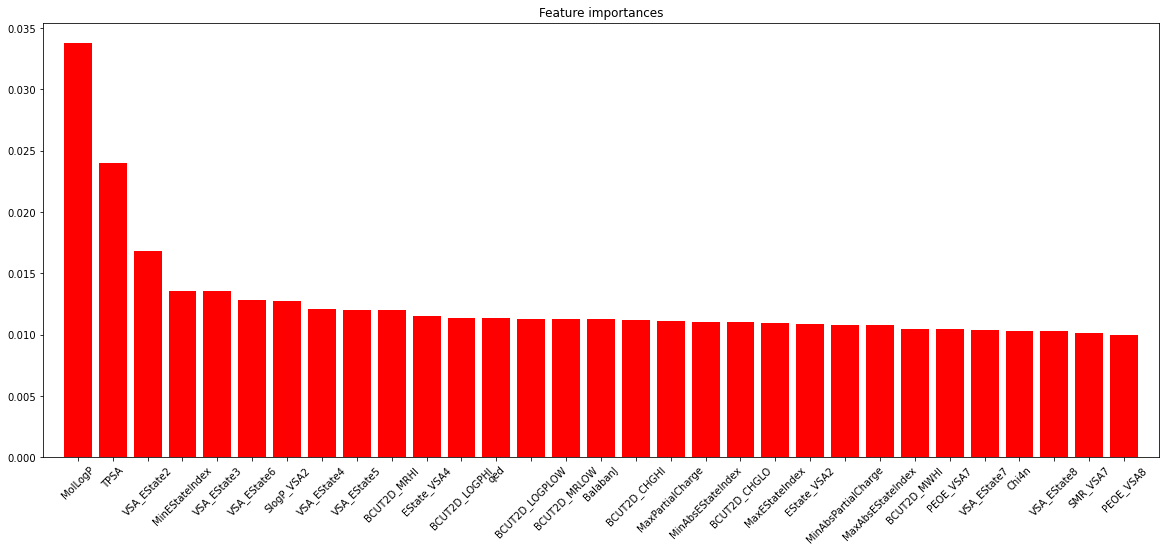

In [144]:
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(range(len(index_list)), importances[index_list], color='r', align='center')
plt.xticks(range(len(index_list)), x.columns[index_list], rotation=45)
plt.xlim([-1, len(index_list)])
plt.savefig('./Figure/hERG_FI.jpg', bbox_inches = 'tight')
plt.show()

# AOT - EPA

In [147]:
df = pd.read_csv('./Model-Free-Final/AOT_EPA_Model_Free.csv')
df_raw = df.iloc[:,3:]

x = df_raw.iloc[:, 1025:]
y = df_raw['EPA_category']

print(x.shape)
print(y.shape)

forest.fit(x,y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature Ranking")
index_list = []
for f in range(x.shape[1]):
    if importances[indices[f]] > 0.014:
        print("{}. feature {} ({:.5f})".format(f+1, x.columns[indices][f], importances[indices[f]]))
        index_list.append(indices[f])
# index_list

(11744, 145)
(11744,)
Feature Ranking
1. feature BCUT2D_LOGPHI (0.02471)
2. feature BCUT2D_MRHI (0.02405)
3. feature MaxPartialCharge (0.02228)
4. feature qed (0.02093)
5. feature MinEStateIndex (0.02083)
6. feature MaxAbsPartialCharge (0.02056)
7. feature MinPartialCharge (0.02035)
8. feature MolLogP (0.01936)
9. feature BCUT2D_MWLOW (0.01872)
10. feature MinAbsPartialCharge (0.01852)
11. feature BCUT2D_MRLOW (0.01841)
12. feature BCUT2D_MWHI (0.01831)
13. feature BCUT2D_LOGPLOW (0.01808)
14. feature BCUT2D_CHGHI (0.01745)
15. feature MaxEStateIndex (0.01689)
16. feature Chi3v (0.01658)
17. feature MinAbsEStateIndex (0.01650)
18. feature Chi4n (0.01636)
19. feature Chi2n (0.01626)
20. feature Chi3n (0.01620)
21. feature BCUT2D_CHGLO (0.01614)
22. feature FpDensityMorgan1 (0.01606)
23. feature Chi4v (0.01585)
24. feature MaxAbsEStateIndex (0.01573)
25. feature BalabanJ (0.01565)
26. feature Chi2v (0.01557)
27. feature SMR_VSA1 (0.01550)
28. feature FpDensityMorgan2 (0.01528)
29. featur

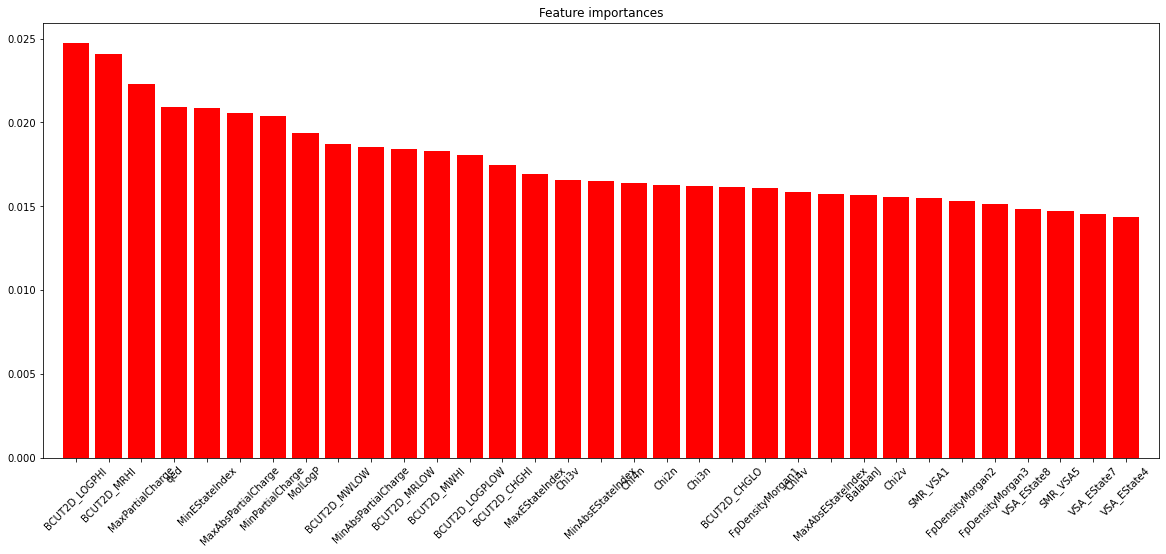

In [148]:
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(range(len(index_list)), importances[index_list], color='r', align='center')
plt.xticks(range(len(index_list)), x.columns[index_list], rotation=45)
plt.xlim([-1, len(index_list)])
plt.savefig('./Figure/EPA_FI.jpg', bbox_inches = 'tight')
plt.show()

# AOT - GHS

In [149]:
df = pd.read_csv('./Model-Free-Final/AOT_GHS_Model_Free.csv')
df_raw = df.iloc[:,3:]

x = df_raw.iloc[:, 1025:]
y = df_raw['GHS_category']

print(x.shape)
print(y.shape)

forest.fit(x,y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature Ranking")
index_list = []
for f in range(x.shape[1]):
    if importances[indices[f]] > 0.014:
        print("{}. feature {} ({:.5f})".format(f+1, x.columns[indices][f], importances[indices[f]]))
        index_list.append(indices[f])
# index_list

(11834, 145)
(11834,)
Feature Ranking
1. feature BCUT2D_MRHI (0.02247)
2. feature BCUT2D_LOGPHI (0.02241)
3. feature MaxPartialCharge (0.02205)
4. feature MaxAbsPartialCharge (0.02012)
5. feature MinPartialCharge (0.02004)
6. feature MinAbsPartialCharge (0.01995)
7. feature MinEStateIndex (0.01970)
8. feature BCUT2D_MRLOW (0.01952)
9. feature BCUT2D_MWLOW (0.01941)
10. feature BCUT2D_LOGPLOW (0.01845)
11. feature MaxAbsEStateIndex (0.01835)
12. feature BCUT2D_MWHI (0.01818)
13. feature qed (0.01800)
14. feature MaxEStateIndex (0.01771)
15. feature MolLogP (0.01769)
16. feature BCUT2D_CHGLO (0.01764)
17. feature FpDensityMorgan1 (0.01760)
18. feature BCUT2D_CHGHI (0.01664)
19. feature SMR_VSA1 (0.01644)
20. feature FpDensityMorgan2 (0.01640)
21. feature Chi2n (0.01604)
22. feature Chi3v (0.01584)
23. feature Chi2v (0.01567)
24. feature MinAbsEStateIndex (0.01546)
25. feature Chi4n (0.01544)
26. feature FpDensityMorgan3 (0.01542)
27. feature BalabanJ (0.01506)
28. feature SMR_VSA5 (0.014

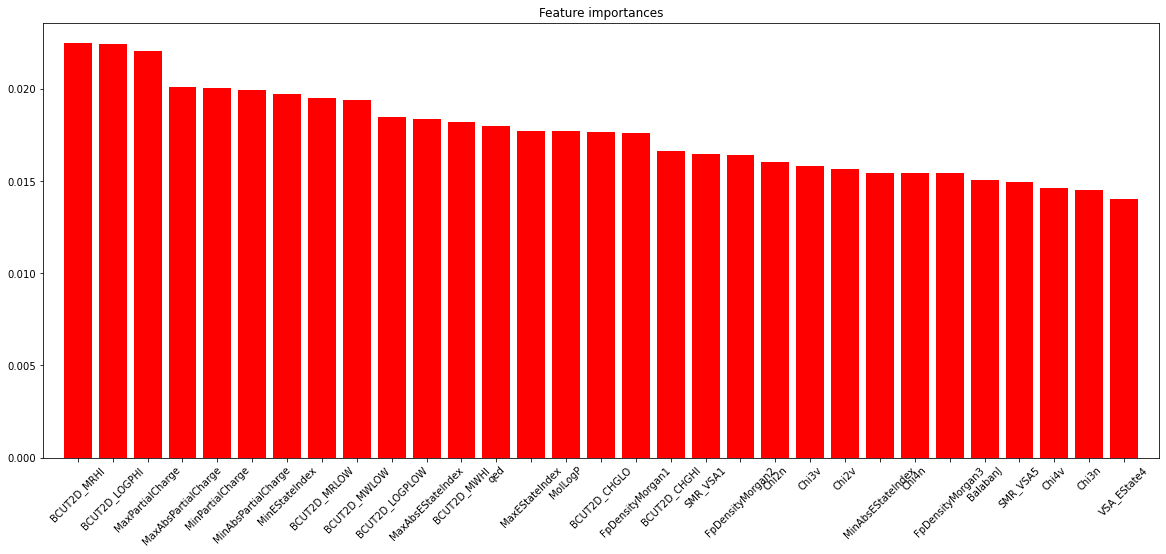

In [150]:
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(range(len(index_list)), importances[index_list], color='r', align='center')
plt.xticks(range(len(index_list)), x.columns[index_list], rotation=45)
plt.xlim([-1, len(index_list)])
plt.savefig('./Figure/GHS_FI.jpg', bbox_inches = 'tight')
plt.show()